# Telco Customer Churn Prediction

In [40]:
# importing neccesary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

# Preprocessing

In [2]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# converting TotalCharges column to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
# filling missing values with 0
data['TotalCharges'].fillna(0, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data['Churn'] = data['Churn'].map({'No' : 0, 'Yes': 1})

In [11]:
columns_selected = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [12]:
data = data[columns_selected]

In [13]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,1


In [14]:
X = data.drop(columns = ["Churn"])
y = data[['Churn']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [17]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
scaler = StandardScaler()
scaler.fit(X_train[numerical])
X_train[numerical] = scaler.transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [19]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
1814,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,-0.825884,-1.497530,-0.890947
5946,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),0.395961,0.302996,0.389693
3881,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),1.577078,0.012320,1.060945
2389,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,1.577078,0.686687,1.775397
3676,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,-0.092777,0.186726,-0.102671


In [20]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(X_train[categorical])
encoded_cols = list(encoder.get_feature_names_out(categorical))

In [21]:
X_train[encoded_cols] = encoder.transform(X_train[categorical])
X_test[encoded_cols] = encoder.transform(X_test[categorical])

In [22]:
X_train = X_train.drop(columns = categorical)
X_test = X_test.drop(columns = categorical)

In [23]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1814,-0.825884,-1.497530,-0.890947,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5946,0.395961,0.302996,0.389693,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3881,1.577078,0.012320,1.060945,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2389,1.577078,0.686687,1.775397,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3676,-0.092777,0.186726,-0.102671,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
y_train.head()

,Churn
1814,0
5946,1
3881,0
2389,0
3676,0


**Question 14**

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-28-5c985f66e0bd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [29]:
test_pred = model.predict(X_test)

In [33]:
print(accuracy_score(test_pred, y_test))

0.7963094393186657


**Question 15**

In [34]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
test_pred = model.predict(X_test)

In [36]:
print(accuracy_score(test_pred, y_test))

0.7934705464868701


**Question 16**

In [37]:
model = LGBMClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785


LGBMClassifier()

In [38]:
test_pred = model.predict(X_test)

In [39]:
print(accuracy_score(test_pred, y_test))

0.8034066713981547


**Question 17**

In [45]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]


# Defining the hyperparameter grid
hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

# Instantiating the Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Instantiating RandomizedSearchCV
random_search = RandomizedSearchCV(extra_trees, param_distributions=hyperparameter_grid, n_iter=10, cv=5, scoring='accuracy', random_state=1, verbose = 1, n_jobs = -1)

# Fitting RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Accessing the best model found by RandomizedSearchCV
best_params = random_search.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [46]:
print(best_params)

{'n_estimators': 50, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}


**Question 18**

In [49]:
# model with hyperparameter tuning
extra_trees = ExtraTreesClassifier(n_estimators = 50, min_samples_split = 7, min_samples_leaf = 6, max_features = 'log2', random_state = 1)
extra_trees.fit(X_train, y_train)

<ipython-input-49-4936b9877d07>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees.fit(X_train, y_train)


ExtraTreesClassifier(max_features='log2', min_samples_leaf=6,
                     min_samples_split=7, n_estimators=50, random_state=1)

In [50]:
test_pred = extra_trees.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.8048261178140526


In [51]:
# model without hyperparameter tuning
extra_trees1 = ExtraTreesClassifier(random_state = 1)
extra_trees1.fit(X_train, y_train)

<ipython-input-51-5efcc0950c8b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees1.fit(X_train, y_train)


ExtraTreesClassifier(random_state=1)

In [52]:
test_pred = extra_trees1.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.7672107877927609


As we can see, the model with hyperparameter tuning performed better than the model without the hyperparameter tuning, which answers Question 18.

**Question 20**

In [54]:
importance = extra_trees.feature_importances_

In [55]:
column_name = X_train.columns

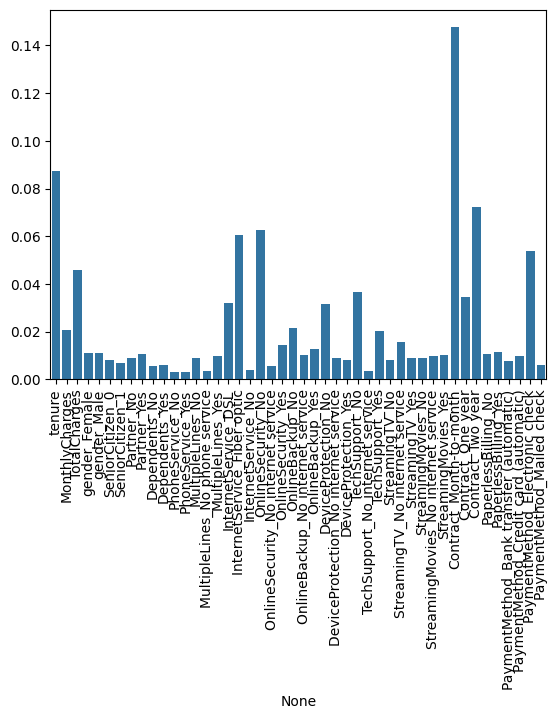

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = column_name, y = importance)
plt.xticks(rotation = 90);

Therefore the feature with higher importance is the "Contract Month-to-Month" and "Tenure" features.